# Predicting if aircraft crash has fatalities or not

In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import scipy
%matplotlib inline

from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('ntsb-aviation-accident-dataset.csv', sep=';')

In [3]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,geo_point
0,20170110X14448,Accident,GAA17CA108,2016-12-31,"Casa Grande, AZ",United States,32.956389,-111.763889,CGZ,CASA GRANDE MUNI,...,NaN,NaN,NaN,NaN,1.0,VMC,APPROACH,Factual,NaN,"32.956389, -111.763889"
1,20161120X44929,Accident,ERA17FA052,2016-11-19,"New Gretna, NJ",United States,39.664722,-74.468056,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,VMC,NaN,Preliminary,NaN,"39.664722, -74.468056"
2,20160922X85052,Accident,GAA16CA502,2016-08-24,"St. Augustine, FL",United States,29.959167,-81.339722,SGJ,NORTHEAST FLORIDA RGNL,...,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Factual,NaN,"29.959167, -81.339722"
3,20160720X01138,Accident,CEN16LA273,2016-07-18,"Lodi, WI",United States,43.333334,-89.520834,9WN5,LODI LAKELAND,...,NaN,NaN,NaN,NaN,1.0,VMC,CRUISE,Factual,NaN,"43.333334, -89.520834"
4,20160104X02458,Accident,WPR16LA045,2016-01-01,"Newman Lake, WA",United States,47.822500,-117.068889,NaN,Warners Airstrip,...,NaN,NaN,NaN,NaN,1.0,NaN,MANEUVERING,Preliminary,NaN,"47.8225, -117.068889"


In [4]:
df.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number of Engines', 'Engine Type', 'FAR Description',
       'Schedule', 'Purpose of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase of Flight', 'Report Status',
       'Publication Date', 'geo_point'],
      dtype='object')

In [5]:
df.shape

(162800, 32)

In [6]:
# Calculate percentage of NaN values in each column
df.isna().sum()/len(df)*100

Event Id                   0.000000
Investigation Type         0.003686
Accident Number            0.000000
Event Date                 0.000000
Location                   0.095209
Country                    0.627150
Latitude                  60.125307
Longitude                 60.136978
Airport Code              41.921990
Airport Name              39.128378
Injury Severity            0.000000
Aircraft Damage            3.433047
Aircraft Category         63.843980
Registration Number        3.618550
Make                       0.104423
Model                      0.136364
Amateur Built              0.812039
Number of Engines          5.499386
Engine Type                5.737101
FAR Description           63.933661
Schedule                  84.340909
Purpose of Flight          6.115479
Air Carrier               94.995086
Total Fatal Injuries      35.931204
Total Serious Injuries    38.760442
Total Minor Injuries      37.146806
Total Uninjured           18.164619
Weather Condition          3

Variables which have over 50 % of NaN values were excluded in features.<br>
: Latitude 60/Longitude 60/Airport Code 41/Aircraft Category  63/ FAR Description 63/ Schedule 84/Air Carrier 94/Publication Date 55/ geo_point 60

In [7]:
# drop NaN values only in variables which might be used as features
df=df.dropna(axis=0, subset=['Event Date', 'Location', 'Country', 
       'Airport Name', 'Aircraft Damage',
       'Registration Number', 'Make', 'Model', 'Amateur Built',
       'Number of Engines', 'Engine Type', 'Purpose of Flight',
       'Weather Condition', 'Broad Phase of Flight', 'Report Status'])
print(df.isna().sum()/len(df)*100)
print(df.shape)

Event Id                   0.000000
Investigation Type         0.000000
Accident Number            0.000000
Event Date                 0.000000
Location                   0.000000
Country                    0.000000
Latitude                  60.088777
Longitude                 60.109859
Airport Code               6.374880
Airport Name               0.000000
Injury Severity            0.000000
Aircraft Damage            0.000000
Aircraft Category         65.088660
Registration Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur Built              0.000000
Number of Engines          0.000000
Engine Type                0.000000
FAR Description           65.013703
Schedule                  92.483193
Purpose of Flight          0.000000
Air Carrier               97.114146
Total Fatal Injuries      35.924434
Total Serious Injuries    37.142489
Total Minor Injuries      34.738001
Total Uninjured           14.914151
Weather Condition          0

# Exploratory Analysis

## Country

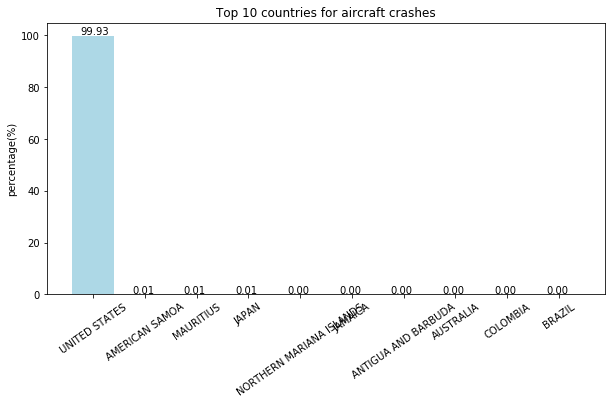

In [8]:
# Calculate the pecentage of crashes for each country
df['Country']=df['Country'].str.upper()
cntry=df['Country'].value_counts()
cntry=cntry/sum(cntry)*100

# Drawing figure 
plt.figure(figsize=(10,5))
plt.bar(cntry[:10].index,cntry[:10], color='#ADD8E6')
plt.gca().tick_params(axis='x', rotation=35)
plt.title('Top 10 countries for aircraft crashes')
plt.ylabel('percentage(%)')

# add annot
xlocs=range(0,10)
y=cntry[:10]
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.5, format(v, '.2f'))
plt.savefig('CapstoneFigure/country.png', bbox_inches='tight', transparent=True)

Since over 95% of the data are the crash that happened in the US, I decided to only include the data from the US

In [9]:
df=df[df['Country']=='UNITED STATES']

## Event date

In [10]:
df['Event Date']=pd.to_datetime(df['Event Date'], format='%Y-%m-%d')

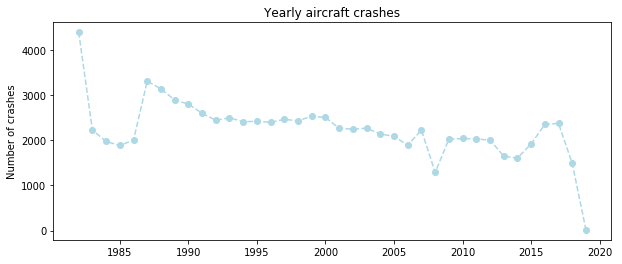

In [11]:
# Yearly trend for airplane crashes
year=pd.DatetimeIndex(df['Event Date']).year
yrcrash=df['Event Date'].groupby(year).count()

# Plot figure
plt.figure(figsize=(10,4))
plt.plot(yrcrash,'go--',marker='o', color='#ADD8E6')
plt.title('Yearly aircraft crashes')
plt.ylabel('Number of crashes')

plt.savefig('CapstoneFigure/yearly.png', bbox_inches='tight', transparent=True)

There are roughly increasing trend over year without 1982.

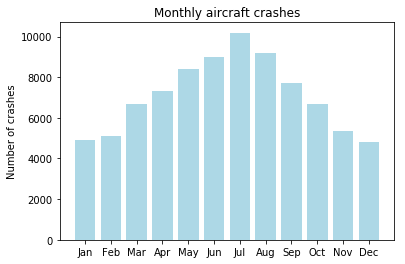

In [12]:
#Monthly trend
month=pd.DatetimeIndex(df['Event Date']).month
moncrash=df['Event Id'].groupby(month).count()

#Plot figure
plt.bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],moncrash, color='#ADD8E6')
plt.title('Monthly aircraft crashes')
plt.ylabel('Number of crashes')

plt.savefig('CapstoneFigure/Monthly.png', bbox_inches='tight', transparent=True)

# assign results to original value
df['Month']=month

Air crashes tend to occur the most during summer. This might be that there are high demand and more air travels in summer. It would be possible to check this possibility if there is a information for number of flights.

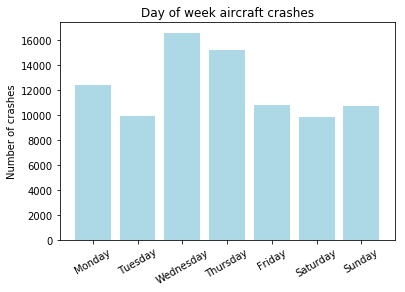

In [13]:
# Calculate day of week trend
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day=pd.DatetimeIndex(df['Event Date']).weekday_name
daycrush=df['Event Id'].groupby(day).count()

# Plotting
plt.bar(daycrush.index, daycrush,tick_label=day_order, color='#ADD8E6')
plt.title('Day of week aircraft crashes')
plt.ylabel('Number of crashes')
plt.gca().tick_params(axis='x',rotation=30)
# plt.savefig('CapstoneFigure/Daily.png', bbox_inches='tight', transparent=True)

# Assign
df['Day']=day

Air crashes occured on Wednesday the most. It also might be due to more flights on Wednesdays and Thursdays. 
I decided to include monthly and daily crashes as features since year information are not suitable to interpret for future airport crash prediction. 

## Location

In [14]:
import folium

state_geo = 'us-states.json'
df['States']=df['Location'].str[-2:]
st_data=df['States'].value_counts()
st_data=st_data/st_data.sum()*100
state_data = st_data

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Airplane Crash'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Airplane Crash (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

The figure shows that California has the most airplane crashes, and Florida is the next. 

In order to reduce dimensions in States variable, the 50 states were devided into 4 categories.

In [15]:
state=df['States'].copy()
state[(state=='WA')|(state=='OR')|(state=='CA')|(state=='MT')|
      (state=='ID')|(state=='WY')|(state=='NV')|(state=='UT')|
      (state=='CO')|(state=='AZ')|(state=='NM')|(state=='AK')|
      (state=='HI')]='West'
state[(state=='ND')|(state=='SD')|(state=='NE')|(state=='KS')|
      (state=='MN')|(state=='IA')|(state=='MO')|(state=='WI')|
      (state=='IL')|(state=='MI')|(state=='IN')|(state=='OH')]='MidWest'
state[(state=='OK')|(state=='AR')|(state=='TX')|(state=='LA')|
      (state=='KY')|(state=='TN')|(state=='MS')|(state=='AL')|
      (state=='WV')|(state=='VA')|(state=='DE')|(state=='MD')|
      (state=='DC')|(state=='NC')|(state=='SC')|(state=='GA')|
      (state=='FL')]='South'
state[(state=='NH')|(state=='VT')|(state=='ME')|(state=='MA')|
      (state=='RI')|(state=='CT')|(state=='NY')|(state=='PA')|
      (state=='NJ')]='NorthEast'

Other areas which are not categorized into any of 4 areas were removed.

In [16]:
# Categorizing
df['State']=state
df=df[(df['State']=='West') | (df['State']=='South') | (df['State']=='MidWest') | (df['State']=='NorthEast')]


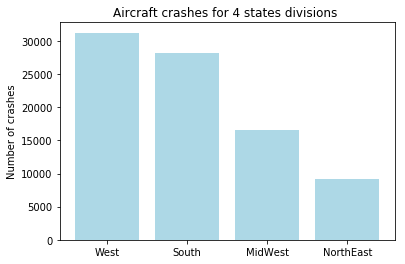

In [17]:
state=df['State'].value_counts()
plt.bar(state.index,state, color='#ADD8E6')
plt.title('Aircraft crashes for 4 states divisions ')
plt.ylabel('Number of crashes')
plt.savefig('CapstoneFigure/States.png', bbox_inches='tight', transparent=True)

In [18]:
# from folium.plugins import MarkerCluster


# m = folium.Map(location=[44, -73], zoom_start=5)

# marker_cluster = MarkerCluster().add_to(m)

# geolist=list(zip(df.Latitude.dropna(), df.Longitude.dropna()))
# for lat, long in geolist:
#     folium.Marker(location=[lat,long],
#         icon=None,
#         ).add_to(marker_cluster)

# m.save('CapstoneFigure/location.html')
# m

We only explored the location of crashes. The location variable has over 50% NaN values in it, thus it was excluded.

## Airport name

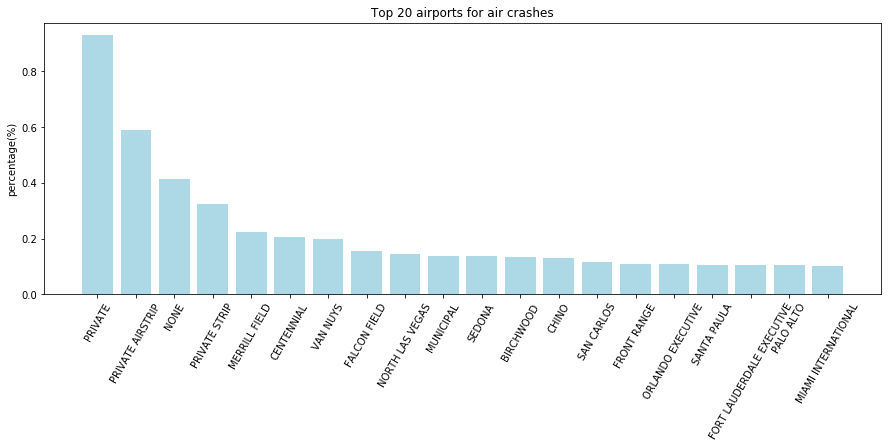

In [19]:
df['Airport Name']=df['Airport Name'].str.upper()
name=df['Airport Name'].value_counts()
name=name/sum(name)*100
plt.figure(figsize=(15,5))
plt.bar(name[:20].index,name[:20], color='#ADD8E6')
plt.gca().tick_params(axis='x', rotation=60)
plt.title('Top 20 airports for air crashes')
plt.ylabel('percentage(%)')
plt.savefig('CapstoneFigure/Airport.png', bbox_inches='tight', transparent=True)

Aircraft crashes happened in Private airport the most. Since including all airport names is unnecessary, I simplified this feature as 'private or public'. 

In [20]:
# exclude unknown or none values
df=df[df['Airport Name']!='NONE']
df=df[df['Airport Name']!='UNKNOWN']

air=df['Airport Name'].copy()
air[air=='PRIVATE AIRSTRIP']='PRIVATE'
air[air=='PRIVATE STRIP']='PRIVATE'
air[air!='PRIVATE']='PUBLIC'
air.value_counts()

PUBLIC     83180
PRIVATE     1569
Name: Airport Name, dtype: int64

In [21]:
df['Airport Name']=air

## Aircraft Damage

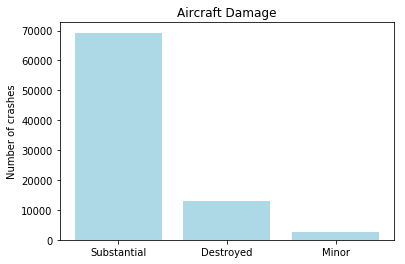

In [22]:
damage=df['Aircraft Damage'].value_counts()
plt.bar(damage.index, damage, color='#ADD8E6')
plt.title('Aircraft Damage')
plt.ylabel('Number of crashes')

plt.savefig('CapstoneFigure/Damage.png', bbox_inches='tight', transparent=True)

In [23]:
# cat=['Substantial','Destroyed','Minor']
# x=np.arange(len(cat))
# width=0.4
# damage=df['Aircraft Damage'].groupby(df['Injury Severity']).value_counts()
# nofatal=damage[0]
# fatal=damage[1]
# plt.bar(x-(width/2),nofatal,width=width,label='Non-fatal')
# plt.bar(x+(width/2),fatal,width=width,color='#ADD8E6',label='Fatal')
# plt.xticks(x,cat)
# plt.legend()
# plt.title('Aircraft Damage by fatality')
# plt.ylabel('Number of crashes')
# plt.savefig('CapstoneFigure/Damage_fatality.png', bbox_inches='tight', transparent=True)

## Make

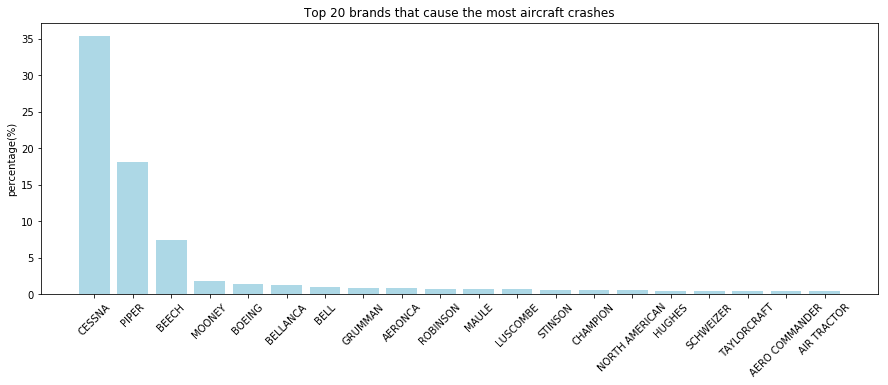

In [24]:
df['Make']=df['Make'].str.upper()
make=df['Make'].value_counts()
make=make/sum(make)*100
plt.figure(figsize=(15,5))
plt.bar(make[:20].index,make[:20],color='#ADD8E6')
plt.gca().tick_params(axis='x',rotation=45)
plt.title('Top 20 brands that cause the most aircraft crashes')
plt.ylabel('percentage(%)')
plt.savefig('CapstoneFigure/Brands.png', bbox_inches='tight', transparent=True)

Top 3 brands (Cessna, Piper, Beech) take over 50%. To reduce the levels of variable, brands were categorized into 4 different values(Cessna, Piper, Beech, Others).

In [25]:
brand=df['Make'].copy()
brand[(brand!='CESSNA')&(brand!='PIPER')&(brand!='BEECH')]='OTHER'
brand.value_counts()

OTHER     33087
CESSNA    30027
PIPER     15337
BEECH      6298
Name: Make, dtype: int64

In [26]:
df['Make']=brand

## Model

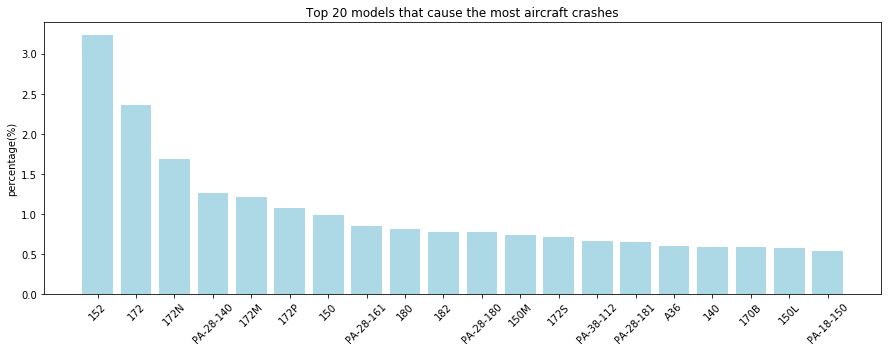

In [27]:
model=df['Model'].value_counts()
model=model/sum(model)*100
plt.figure(figsize=(15,5))
plt.bar(model[:20].index,model[:20],color='#ADD8E6')
plt.gca().tick_params(axis='x',rotation=45)
plt.title('Top 20 models that cause the most aircraft crashes')
plt.ylabel('percentage(%)')
plt.savefig('CapstoneFigure/Models.png', bbox_inches='tight', transparent=True)

Model information might be redundant, since it highly overlap with make information. For example, 152 model are only manufatured by Cessna. Thus, model variable was excluded in features. 

## Amateur Built

In [28]:
df['Amateur Built'].value_counts()

No     75393
Yes     9356
Name: Amateur Built, dtype: int64

## Number of Engines

In [29]:
engine=df['Number of Engines'].value_counts()
engine

1.0     72127
2.0     11499
3.0       451
0.0       363
4.0       307
18.0        2
Name: Number of Engines, dtype: int64

## Engine Type

Reciprocating       90.919067
Turbo Prop           4.102703
Turbo Fan            1.991764
Turbo Shaft          1.640137
Turbo Jet            0.829508
Unknown              0.489681
None                 0.010620
Electric             0.007080
REC, ELEC            0.004720
REC, TJ, TJ          0.002360
TJ, REC, REC, TJ     0.002360
Name: Engine Type, dtype: float64

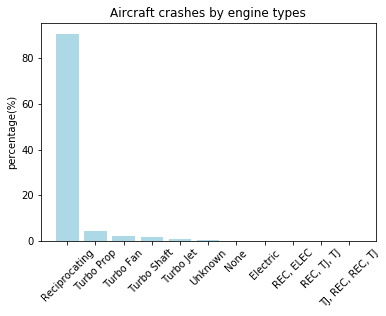

In [30]:
enginetype=df['Engine Type'].value_counts()
enginetype=enginetype/sum(enginetype)*100
plt.bar(enginetype.index,enginetype,color='#ADD8E6')
plt.gca().tick_params(axis='x',rotation=45)
plt.title('Aircraft crashes by engine types')
plt.ylabel('percentage(%)')
# plt.savefig('CapstoneFigure/EngineType.png', bbox_inches='tight', transparent=True)
enginetype

In [31]:
# Remove unknown and none values
df=df[(df['Engine Type']!='Unknown')&(df['Engine Type']!='None')]

## Purpose of Flight

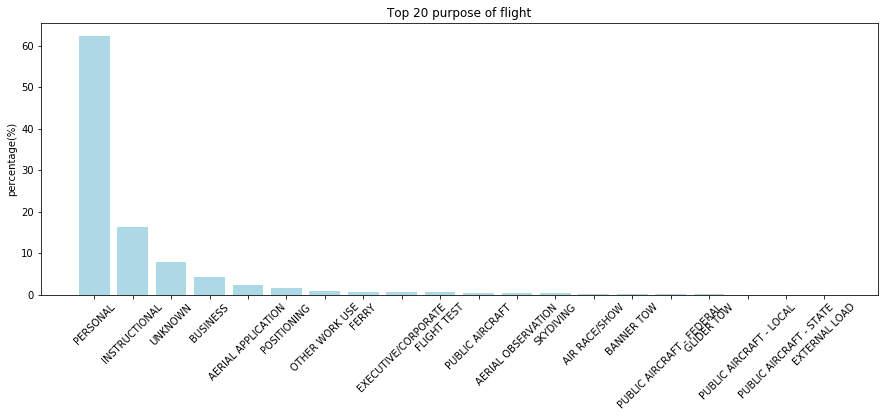

In [32]:
df['Purpose of Flight']=df['Purpose of Flight'].str.upper()
pof=df['Purpose of Flight'].value_counts()
pof=pof/sum(pof)*100
plt.figure(figsize=(15,5))
plt.bar(pof[:20].index,pof[:20],color='#ADD8E6')
plt.gca().tick_params(axis='x',rotation=45)
plt.title('Top 20 purpose of flight')
plt.ylabel('percentage(%)')
plt.savefig('CapstoneFigure/PurposeofFlight.png', bbox_inches='tight', transparent=True)

In [33]:
purpose=df['Purpose of Flight'].copy()
purpose[(purpose!='PERSONAL')&(purpose!='INSTRUCTIONAL')]='OTHER'
purpose.value_counts()

PERSONAL         52557
OTHER            17949
INSTRUCTIONAL    13819
Name: Purpose of Flight, dtype: int64

In [34]:
df['Purpose of Flight']=purpose

## Weather Condition

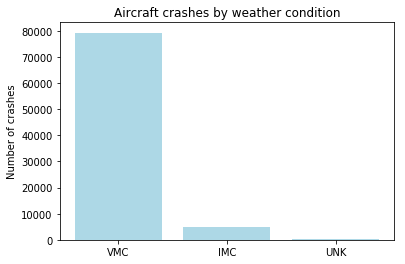

In [35]:
weather=df['Weather Condition'].value_counts()
plt.bar(weather.index,weather,color='#ADD8E6')
plt.title('Aircraft crashes by weather condition')
plt.ylabel('Number of crashes')
plt.savefig('CapstoneFigure/Weather.png', bbox_inches='tight', transparent=True)


In [36]:
# remove unknown value
df=df[df['Weather Condition']!='UNK']

## Broad Phase of Flight

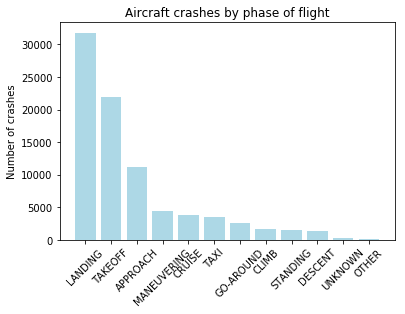

In [37]:
phase=df['Broad Phase of Flight'].value_counts()
plt.bar(phase.index,phase,color='#ADD8E6')
plt.gca().tick_params(axis='x',rotation=45)
plt.title('Aircraft crashes by phase of flight')
plt.ylabel('Number of crashes')
plt.savefig('CapstoneFigure/Phase.png', bbox_inches='tight', transparent=True)

In [38]:
# Remove unknown values
df=df[df['Broad Phase of Flight']!='UNKNOWN']

# Outcome variable

In [39]:
injury=df[['Injury Severity','Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']]
injury.head()

,Injury Severity,Total Serious Injuries,Total Minor Injuries,Total Uninjured
0,Non-Fatal,NaN,NaN,1.0
2,Non-Fatal,NaN,NaN,1.0
3,Non-Fatal,NaN,NaN,1.0
14,Non-Fatal,0.0,0.0,1.0
16,Fatal(4),0.0,0.0,0.0


Since there are a lot of NaN values (it indicates no information rather than just 0), I decided to simplify the outcome variable which comprised of 'Non-Fatal/Incident or Fatal' using 'Injury Severity' column 

In [40]:
# drop unavailable cases
df=df[df['Injury Severity']!='Unavailable']

In [41]:
t=df['Injury Severity'].copy()
t[(t=='Non-Fatal')|(t=='Incident')]=0
t[t!=0]=1
df['Injury Severity']=t
t.shape

(83841,)

# Features

In [42]:
features=df[['Month', 'Day','State','Airport Name',
            'Make','Amateur Built', 'Number of Engines', 'Engine Type',
            'Purpose of Flight','Broad Phase of Flight','Weather Condition']]

In [43]:
features.head()

,Month,Day,State,Airport Name,Make,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Broad Phase of Flight,Weather Condition
0,12,Saturday,West,PUBLIC,OTHER,Yes,1.0,Reciprocating,PERSONAL,APPROACH,VMC
2,8,Wednesday,South,PUBLIC,OTHER,Yes,1.0,Reciprocating,PERSONAL,LANDING,VMC
3,7,Monday,MidWest,PUBLIC,OTHER,Yes,1.0,Reciprocating,PERSONAL,CRUISE,VMC
14,9,Monday,South,PUBLIC,CESSNA,No,1.0,Reciprocating,OTHER,APPROACH,VMC
16,4,Tuesday,West,PUBLIC,OTHER,No,2.0,Turbo Prop,OTHER,APPROACH,IMC


In [44]:
# Remove white space in column names
features.columns=features.columns.str.replace(' ','')

In [45]:
data=features
data['Outcome']=t
data.head()

/Users/yunjin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Month,Day,State,AirportName,Make,AmateurBuilt,NumberofEngines,EngineType,PurposeofFlight,BroadPhaseofFlight,WeatherCondition,Outcome
0,12,Saturday,West,PUBLIC,OTHER,Yes,1.0,Reciprocating,PERSONAL,APPROACH,VMC,0
2,8,Wednesday,South,PUBLIC,OTHER,Yes,1.0,Reciprocating,PERSONAL,LANDING,VMC,0
3,7,Monday,MidWest,PUBLIC,OTHER,Yes,1.0,Reciprocating,PERSONAL,CRUISE,VMC,0
14,9,Monday,South,PUBLIC,CESSNA,No,1.0,Reciprocating,OTHER,APPROACH,VMC,0
16,4,Tuesday,West,PUBLIC,OTHER,No,2.0,Turbo Prop,OTHER,APPROACH,IMC,1


In [46]:
data.columns

Index(['Month', 'Day', 'State', 'AirportName', 'Make', 'AmateurBuilt',
       'NumberofEngines', 'EngineType', 'PurposeofFlight',
       'BroadPhaseofFlight', 'WeatherCondition', 'Outcome'],
      dtype='object')

In [47]:
data.isna().sum()

Month                 0
Day                   0
State                 0
AirportName           0
Make                  0
AmateurBuilt          0
NumberofEngines       0
EngineType            0
PurposeofFlight       0
BroadPhaseofFlight    0
WeatherCondition      0
Outcome               0
dtype: int64

In [48]:
from patsy import dmatrices

# create dummy variables
y, X = dmatrices('Outcome ~ C(Month) + C(Day)+ C(AirportName) + C(Make) + C(AmateurBuilt) + NumberofEngines + C(EngineType) + C(PurposeofFlight) + C(BroadPhaseofFlight) + C(WeatherCondition)', data, return_type="dataframe")

X=X.drop('Intercept',axis=1)
y=t.astype('int')
X.head()

,C(Month)[T.2],C(Month)[T.3],C(Month)[T.4],C(Month)[T.5],C(Month)[T.6],C(Month)[T.7],C(Month)[T.8],C(Month)[T.9],C(Month)[T.10],C(Month)[T.11],...,C(BroadPhaseofFlight)[T.DESCENT],C(BroadPhaseofFlight)[T.GO-AROUND],C(BroadPhaseofFlight)[T.LANDING],C(BroadPhaseofFlight)[T.MANEUVERING],C(BroadPhaseofFlight)[T.OTHER],C(BroadPhaseofFlight)[T.STANDING],C(BroadPhaseofFlight)[T.TAKEOFF],C(BroadPhaseofFlight)[T.TAXI],C(WeatherCondition)[T.VMC],NumberofEngines
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


## Correlation among the features and the outcome variable

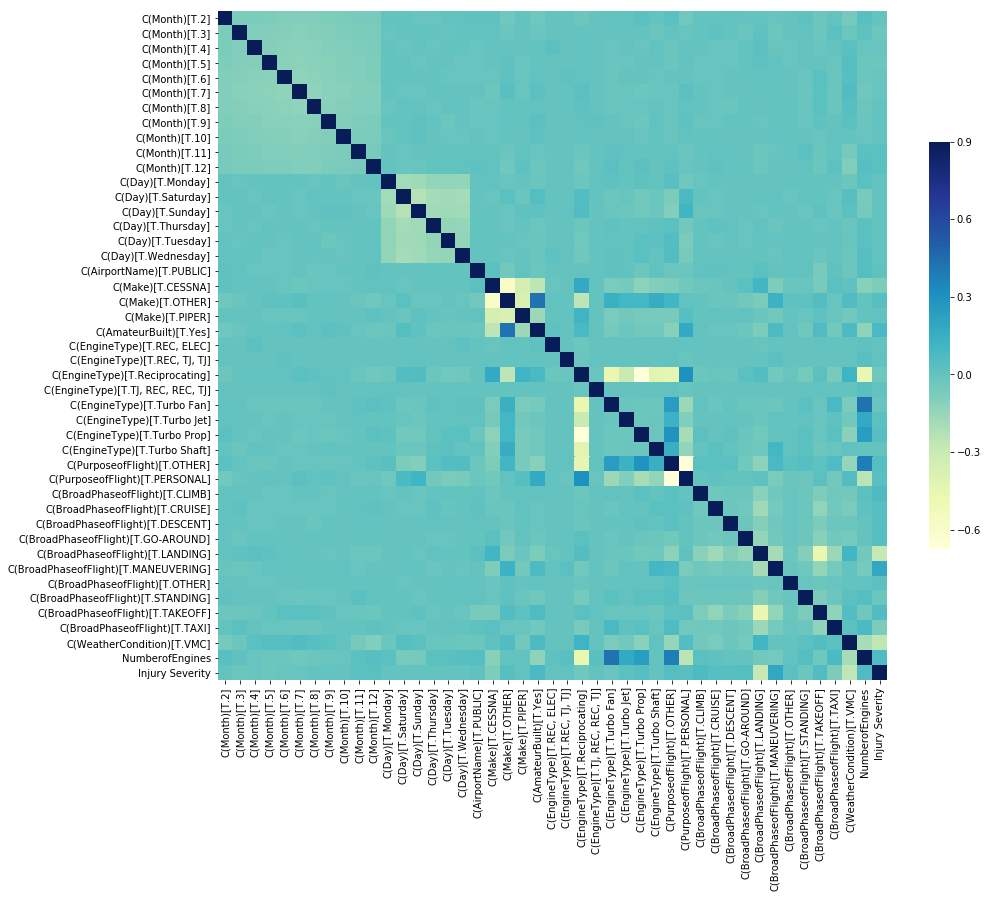

In [49]:
corrmat=X.join(t.astype(int)).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.9, cmap="YlGnBu", square=True, cbar_kws={"shrink": .5})
plt.savefig('CapstoneFigure/Heatmap.png')

In [50]:
corrmat['Injury Severity'].sort_values()[:5]

C(BroadPhaseofFlight)[T.LANDING]   -0.277317
C(WeatherCondition)[T.VMC]         -0.258864
C(Make)[T.CESSNA]                  -0.084397
C(BroadPhaseofFlight)[T.TAXI]      -0.077115
C(EngineType)[T.Reciprocating]     -0.030692
Name: Injury Severity, dtype: float64

Why those have negative correlation with Injury severity?

In [51]:
data['Outcome'].value_counts()

0    72281
1    11560
Name: Outcome, dtype: int64

There is a class imbalance, so down sampling was conducted.
# Down Sampling

In [52]:
from sklearn.utils import resample

n_minor=len(data[data['Outcome']==1])
# Separate majority and minority classes
df_majority = data[data.Outcome==0]
df_minority = data[data.Outcome==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=n_minor,     # to match minority class
                                 random_state=1) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Outcome.value_counts()

# Name: balance, dtype: int64

1    11560
0    11560
Name: Outcome, dtype: int64

In [53]:
# create dummy variables
y, X = dmatrices('Outcome ~ C(Month) + C(Day)+ C(AirportName) + C(Make) + C(AmateurBuilt) + NumberofEngines + C(EngineType) + C(PurposeofFlight) + C(BroadPhaseofFlight) + C(WeatherCondition)', df_downsampled, return_type="dataframe")

X=X.drop('Intercept',axis=1)
y=df_downsampled.Outcome.astype('int')

# Modeling
# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')
neighbors.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [55]:
print('\nCross Validation\n')
knnscore = cross_val_score(neighbors, X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))


Cross Validation

Accuracy: 0.82 (+/- 0.01)


# Random Forest

In [66]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(random_state=0, n_jobs=-1)
rfc.fit(X,y)
print('\nCross Validation\n')
rfscore = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (rfscore.mean(), rfscore.std() * 2))


Cross Validation

Accuracy: 0.85 (+/- 0.01)


Text(0.5, 1.0, 'Variable Importance')

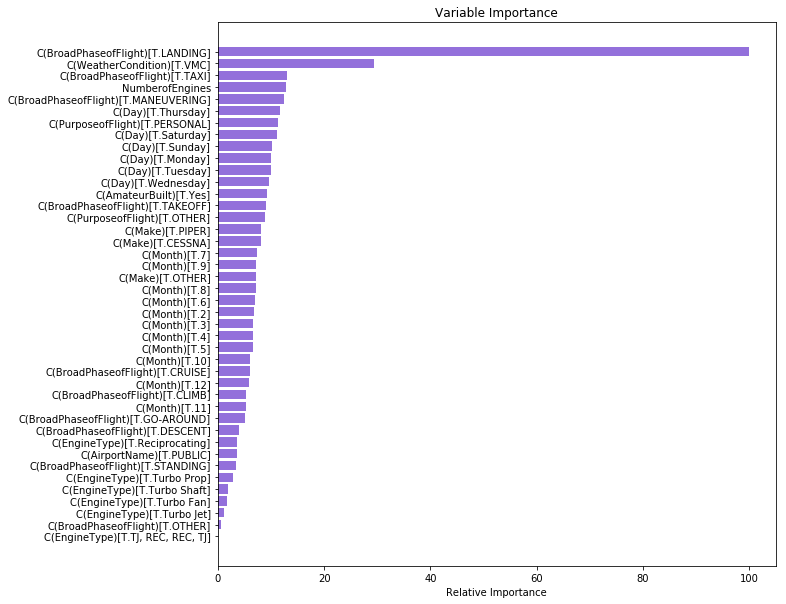

In [57]:

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center',color='#9370DB')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

# plt.savefig('CapstoneFigure/rf_featureimportance.png', bbox_inches='tight', transparent=True, dpi=300)

In [58]:
# removed features below C(Month)[T.7]
cut_X=X[X.columns[sorted_idx][:-30:-1]]
cut_rfc = ensemble.RandomForestClassifier(random_state=0, n_jobs=-1)
print('\nCross Validation\n')
rfscore_removed = cross_val_score(cut_rfc, cut_X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (rfscore_removed.mean(), rfscore_removed.std() * 2))


Cross Validation

Accuracy: 0.83 (+/- 0.01)


When removing features which even seem like less importance, the accuracy got decreased. 

# Gradient Boosting

In [59]:
from sklearn import ensemble

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
# Initialize and fit the model.
gbc = ensemble.GradientBoostingClassifier(**params)
print('\nCross Validation\n')
gbcscore = cross_val_score(gbc, X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (gbcscore.mean(), gbcscore.std() * 2))




Cross Validation

Accuracy: 0.82 (+/- 0.01)


Text(0.5, 1.0, 'Variable Importance')

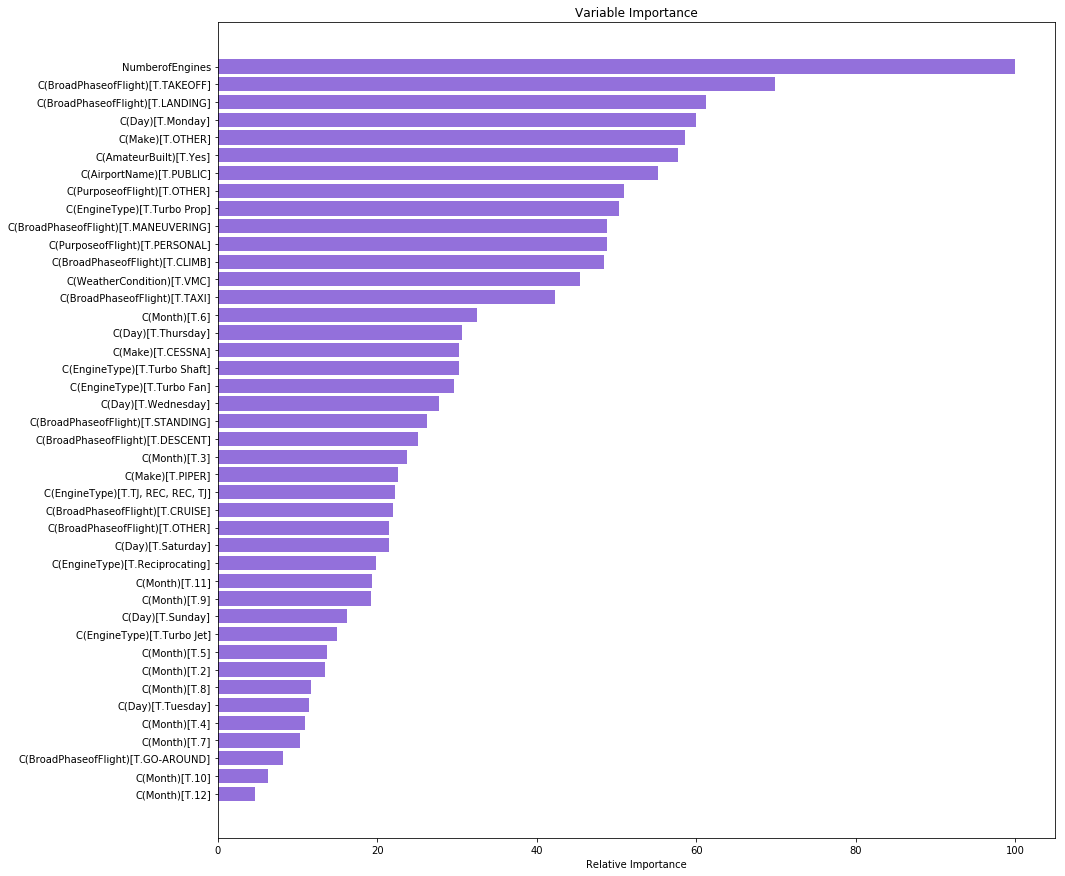

In [60]:
gbc.fit(X,y.astype(int))
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center',color='#9370DB')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

# plt.savefig('CapstoneFigure/GB_featureimportance.png', bbox_inches='tight', transparent=True)

# Support Vector Machine

In [61]:
from sklearn.svm import SVC

svc = SVC(random_state=1)
svc.fit(X,y.astype(int))
print('\nCross Validation\n')
svcscore = cross_val_score(svc, X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (svcscore.mean(), svcscore.std() * 2))


Cross Validation

Accuracy: 0.81 (+/- 0.01)


# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr.fit(X,y)
print('\nCross Validation\n')
lrscore = cross_val_score(lr, X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (lrscore.mean(), lrscore.std() * 2))


Cross Validation

Accuracy: 0.82 (+/- 0.01)


# Model Comparison

Text(0, 0.5, 'Area Under Curve')

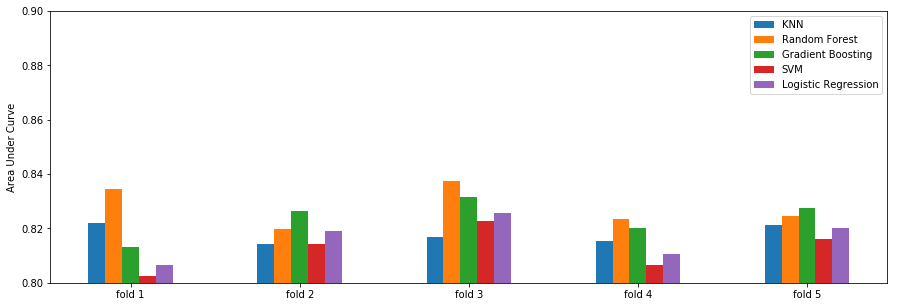

In [63]:
# Generating figure for each fold
cat=['fold 1','fold 2','fold 3','fold 4','fold 5']
x=np.arange(len(cat))
width=0.1
plt.figure(figsize=(15,5))
plt.bar(x-(width*2),knnscore,width=width,label='KNN')
plt.bar(x-(width),rfscore,width=width,label='Random Forest')
plt.bar(x,gbcscore,width=width,label='Gradient Boosting')
plt.bar(x+(width),svcscore,width=width,label='SVM')
plt.bar(x+(width*2),lrscore,width=width,label='Logistic Regression')

plt.xticks(x,cat)
plt.ylim([0.8,0.9])
plt.legend()
plt.title('')
plt.ylabel('Area Under Curve')
# plt.savefig('CapstoneFigure/Damage_fatality.png', bbox_inches='tight', transparent=True)

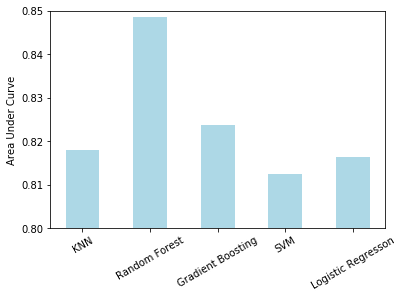

In [69]:
# Comparing all models used
cat=['KNN','Random Forest','Gradient Boosting','SVM','Logistic Regresson']
x=np.arange(len(cat))
width=0.5
plt.bar(cat,[knnscore.mean(),rfscore.mean(),gbcscore.mean(),
             svcscore.mean(),lrscore.mean()],color='#ADD8E6',width=width,label='KNN')


plt.ylim([0.8,0.85])
plt.ylabel('Area Under Curve')
plt.gca().tick_params(axis='x',rotation=30)

plt.savefig('CapstoneFigure/ModelComparison.png', bbox_inches='tight', transparent=True,dpi=300)

In [65]:
# Obtaining roc curve from all models
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

knn=KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train,y_train)
knn_pred_proba=knn.predict_proba(X_test)[:,1]
knn_fpr,knn_tpr,_=roc_curve(y_test,knn_pred_proba)
knn_roc_auc=auc(knn_fpr,knn_tpr)

rf=ensemble.RandomForestClassifier(random_state=0, n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred_proba=rf.predict_proba(X_test)[:,1]
rf_fpr,rf_tpr,_=roc_curve(y_test,rf_pred_proba)
rf_roc_auc=auc(rf_fpr,rf_tpr)

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
gbc = ensemble.GradientBoostingClassifier(**params)
gbc.fit(X_train,y_train)
gbc_pred_proba=gbc.predict_proba(X_test)[:,1]
gbc_fpr,gbc_tpr,_=roc_curve(y_test,gbc_pred_proba)
gbc_roc_auc=auc(gbc_fpr,gbc_tpr)

svc = SVC(random_state=1,probability=True)
svc.fit(X_train,y_train)
svc_pred_proba=svc.predict_proba(X_test)[:,1]
svc_fpr,svc_tpr,_=roc_curve(y_test,svc_pred_proba)
svc_roc_auc=auc(svc_fpr,svc_tpr)

lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
lr_pred_proba=lr.predict_proba(X_test)[:,1]
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_pred_proba)
lr_roc_auc=auc(lr_fpr,lr_tpr)



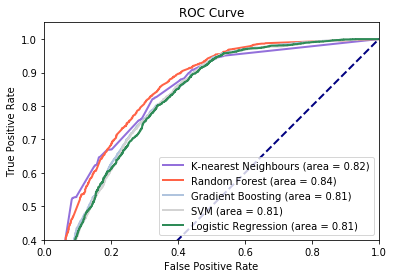

In [68]:
# drawing roc curve figure
plt.figure()
plt.plot(knn_fpr, knn_tpr,color='#9370DB',
         lw=2, label='K-nearest Neighbours (area = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr,color='#FF6347',
         lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(gbc_fpr, gbc_tpr,color='#B0C4DE',
         lw=2, label='Gradient Boosting (area = %0.2f)' % gbc_roc_auc)
plt.plot(svc_fpr, svc_tpr,color='#D3D3D3',
         lw=2, label='SVM (area = %0.2f)' % svc_roc_auc)
plt.plot(lr_fpr, lr_tpr, color='#2E8B57',
         lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.4, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


# plt.savefig('CapstoneFigure/ROCcurve.png', bbox_inches='tight', transparent=True,dpi=300)